# 1. Optimization Techniques
Momentum

In [1]:
import tensorflow as tf

# Optimizer with Momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


# Nesterov Momentum

In [2]:
# Optimizer with Nesterov Momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)


# RMSProp

In [3]:
# RMSProp Optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)


# Adam

In [4]:
# Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


# AdaMax

In [5]:
# AdaMax Optimizer
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)


# Nadam

In [6]:
# Nadam Optimizer
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)


# 2. Learning Rate Scheduling Techniques
Exponential Decay

In [8]:
# Exponential Decay Learning Rate Schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


# Performance Scheduling with ReduceLROnPlateau

In [9]:
# Reduce learning rate when a metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-5
)


# Piecewise Constant Scheduling (Manual Implementation)

In [11]:
# Piecewise Constant Decay
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[1000, 2000],
    values=[0.001, 0.0005, 0.0001]
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


# 3. Regularization Techniques
L2 Regularization

In [12]:
# Model layer with L2 Regularization
from tensorflow.keras import layers, regularizers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])


# Dropout

In [13]:
# Model layer with Dropout
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer with 20% drop probability
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with 50% drop probability
    layers.Dense(1, activation='sigmoid')
])


Enhancing Deep Neural Network with Optimization, Scheduling, and Regularization Techniques

Objectives

Use different optimizers (Momentum, RMSProp, Adam)

Apply learning rate scheduling techniques (Exponential Decay, ReduceLROnPlateau)

Implement regularization methods (L2, Dropout, MC Dropout)

Use Keras for model training and evaluation

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


In [17]:
# Generate synthetic data for binary classification
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


 Define the Model

This model uses:

L2 Regularization to control model complexity
Dropout layers to prevent overfitting
MC Dropout during inference to get uncertainty estimates

In [18]:
# Define the model with regularization and dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


###  Choose Optimizer and Learning Rate Schedule
We’ll use Adam optimizer with Exponential Decay for the learning rate. Additionally, we add ReduceLROnPlateau to decrease the learning rate when the validation loss plateaus.

In [19]:
# Define learning rate schedule with Exponential Decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

# Adam optimizer with learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


# Step 5: Train the Model with Callbacks
Use ReduceLROnPlateau and save the best model based on validation accuracy.

In [21]:
# Remove ExponentialDecay and set a fixed learning rate, then use ReduceLROnPlateau
fixed_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=fixed_learning_rate)

# Compile the model with a fixed learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model training with ReduceLROnPlateau
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr],  # Use ReduceLROnPlateau here
    batch_size=32
)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9256 - loss: 0.2715 - val_accuracy: 0.9360 - val_loss: 0.2266 - learning_rate: 0.0010
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.2700 - val_accuracy: 0.9355 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2689 - val_accuracy: 0.9370 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.2682 - val_accuracy: 0.9370 - val_loss: 0.2234 - learning_rate: 0.0010
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9260 - loss: 0.2663 - val_accuracy: 0.9375 - val_loss: 0.2298 - learning_rate: 0.0010
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9280 - loss: 0.2631 - val_accuracy: 0.9340 - val_loss: 0.2288 - learning_rate: 0.0010
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2593 - 

## Evaluate the Model Performance
After training, evaluate the model on the validation set.

In [22]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9380 - loss: 0.2205
Validation Loss: 0.21437248587608337
Validation Accuracy: 0.9394999742507935


## Make Predictions with MC Dropout

For uncertainty estimation, use MC Dropout during prediction by enabling dropout layers during inference.

In [23]:
# Monte Carlo Dropout - Multiple stochastic predictions
def mc_dropout_prediction(model, X, num_samples=100):
    y_probas = np.stack([model(X, training=True) for _ in range(num_samples)])
    y_mean = y_probas.mean(axis=0)    # Mean prediction
    y_std = y_probas.std(axis=0)      # Standard deviation as uncertainty measure
    return y_mean, y_std

# Predictions and uncertainty estimation on validation set
y_pred_mean, y_pred_std = mc_dropout_prediction(model, X_val)
print("Predicted probabilities (mean):", y_pred_mean)
print("Prediction uncertainty (std):", y_pred_std)


Predicted probabilities (mean): [[0.9101207 ]
 [0.95490533]
 [0.97991145]
 ...
 [0.42193615]
 [0.05355585]
 [0.05839673]]
Prediction uncertainty (std): [[0.02850946]
 [0.02826841]
 [0.01033684]
 ...
 [0.09136605]
 [0.01897622]
 [0.01662727]]


# Visualize Training Performance
Plot the model’s learning curve to observe training and validation loss.

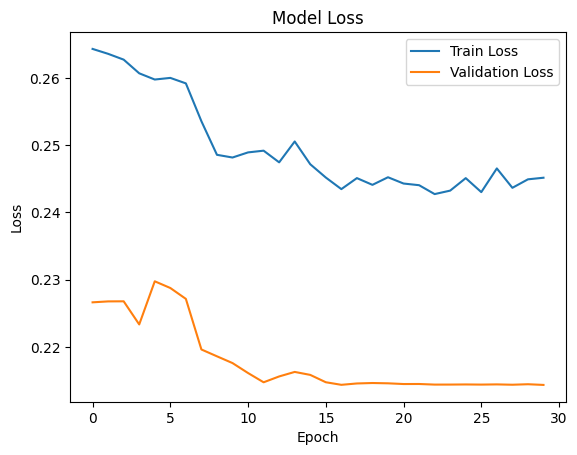

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
